In [22]:
import pandas as pd
import collections
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os.path as checkPath

In [23]:
pxp = []
#distance: yards to go
#yardLine: standardized to the 100 --> goal end zone 0
#type: playtype
cols = ['offenseAbbr', 'down', 'yardLine', 'distance', 'type']
# 2001 to 2017
for year in range(2001, 2018):
    for weekNum in range(1, 16):
        week = 'Week ' + str(weekNum)
        file = 'Improved-NCAA-Football-Data/{0}PXP/PBP - {0} - '.format(year) + week + '.csv'
        if (checkPath.isfile(file)):
            plays = pd.read_csv(file, usecols=cols)
            pxp.append(plays)
    
pxp = pd.concat(pxp)
pxp = pxp.loc[(pxp['down'] == 4) & (pxp['type'] != 'No Play') & (pxp['type'] != 'Fumble Recovery (Opponent)') & (pxp['type'] != 'Timeout') & (pxp['type'] != '')]
pxp['down'] = pxp['down'].apply(lambda down: int(down))
pxp['yardLine'] = pxp['yardLine'].apply(lambda yd: int(yd))
pxp['distance'] = pxp['distance'].apply(lambda yd: int(yd))
pxp['offenseAbbr'] = pxp['offenseAbbr'].apply(lambda team: str(team))

In [24]:
def getTeamMapping(condensed=True):
    mapping = {}
    for index, row in pxp.iterrows():
        posteam = row['offenseAbbr']
        yrdline100 = row['yardLine']
        ydstogo = row['distance']
        playtype = row['type']
        if condensed:
            #ALL SACKS ARE CLASSIFIED AS 'GO FOR IT'
            if playtype != 'Field Goal' and playtype != 'Punt':
                playtype = 'Go For It'       
        if posteam in mapping:
            yrdline100dict = mapping[posteam]
            if yrdline100 in yrdline100dict:
                ydstogomapping = yrdline100dict[yrdline100]
                if ydstogo in ydstogomapping:
                    playtypefreq = ydstogomapping[ydstogo]
                    if playtype in playtypefreq:
                        playtypefreq[playtype] += 1
                    else:
                        playtypefreq[playtype] = 1
                else:
                    ydstogomapping[ydstogo] = {}
                    playtypefreq = ydstogomapping[ydstogo]
                    playtypefreq[playtype] = 1
            else:
                yrdline100dict[yrdline100] = {}
                ydstogomapping = yrdline100dict[yrdline100]
                ydstogomapping[ydstogo] = {}
                playtypefreq = ydstogomapping[ydstogo]
                playtypefreq[playtype] = 1
        else:
            mapping[posteam] = {}
            yrdline100dict = mapping[posteam]
            yrdline100dict[yrdline100] = {}
            ydstogomapping = yrdline100dict[yrdline100]
            ydstogomapping[ydstogo] = {}
            playtypefreq = ydstogomapping[ydstogo]
            playtypefreq[playtype] = 1
    return mapping

In [21]:
teammap = getTeamMapping()
mapping = teammap
mapping

{'AAMU': {3: {3: {'Go For It': 1}},
  5: {3: {'Field Goal': 1}},
  7: {0: {'Field Goal': 1}},
  11: {10: {'Field Goal': 1}},
  15: {2: {'Go For It': 1}},
  18: {15: {'Field Goal': 1}},
  20: {12: {'Field Goal': 1}},
  29: {5: {'Go For It': 1}},
  30: {1: {'Go For It': 1}},
  33: {13: {'Punt': 1}},
  36: {1: {'Go For It': 1}},
  37: {3: {'Punt': 1}, 4: {'Go For It': 1}},
  38: {8: {'Punt': 1}},
  39: {2: {'Go For It': 1}},
  40: {16: {'Go For It': 1}},
  41: {2: {'Go For It': 1}},
  42: {2: {'Punt': 1}, 8: {'Punt': 1}},
  43: {11: {'Punt': 1}},
  44: {1: {'Punt': 1}},
  45: {4: {'Punt': 1}, 8: {'Punt': 1}},
  46: {17: {'Punt': 1}},
  47: {7: {'Punt': 2}, 9: {'Punt': 1}, 11: {'Punt': 1}},
  48: {8: {'Punt': 1}, 12: {'Punt': 1}, 18: {'Punt': 1}},
  50: {1: {'Punt': 1}, 3: {'Punt': 1}, 8: {'Go For It': 1}},
  53: {4: {'Go For It': 1}, 7: {'Punt': 1}, 10: {'Punt': 1}},
  54: {7: {'Punt': 1}, 17: {'Punt': 1}},
  58: {3: {'Punt': 1}, 12: {'Punt': 1}},
  60: {8: {'Punt': 1}},
  62: {9: {'Punt'

In [31]:
def playteamfrequency(team, yrdLine, ydstogo):
    if yrdLine <= 0 or yrdLine >= 100:
        raise ValueError('Invalid yard line')
    if team not in mapping:
        raise ValueError('No such team ' + team + ' in the given data.')
    if yrdLine not in mapping[team]:
        raise ValueError('No such YrdLine found for ' + team + ' in the data.')
    if ydstogo not in mapping[team][yrdLine]:
        raise ValueError('No plays 4th and ' + str(ydstogo) + ' at the ' + str(yrdLine) + ' yard line')
    
    playfrequencies = mapping[team][yrdLine][ydstogo]
    playTypes = ['Go For It', 'Punt', 'Field Goal']
    frequency = []

    if 'Go For It' in playfrequencies:
        frequency.append(playfrequencies['Go For It'])
    else:
        frequency.append(0)
            
    if 'Punt' in playfrequencies:
        frequency.append(playfrequencies['Punt'])
    else:
        frequency.append(0)
        
    if 'Field Goal' in playfrequencies:
        frequency.append(playfrequencies['Field Goal'])
    else:
        frequency.append(0)


    #plt.bar(playTypes, frequency)
    #plt.xlabel('Play Type')
    #plt.ylabel('Frequency')
    #plt.title('Team: ' + team + ' at 4th and ' + str(ydstogo) + ' at the ' + str(yrdLine) + ' yard line')
    
    #plt.show()
            
    return frequency

In [32]:
playteamfrequencies = playteamfrequency('CAL', 1, 1)

In [33]:
def getBiggestPlay(team, yrdLine, yrdstogo): 
    countPlays = playteamfrequency(team, yrdLine, yrdstogo)
    
    max = countPlays[0]
    maxIndex = 0
    for i in range(1, len(countPlays)):
        if countPlays[i] > max:
            max = countPlays[i]
            maxIndex = i
    if maxIndex == 0:
        return 'Go For It', max
    elif maxIndex == 1:
        return 'Punt', max
    elif maxIndex == 2:
        return 'Field Goal', max

In [34]:
def getmostcommonplaybyteam(team):
    filtered_map = {}
    teamdict = mapping[team]
    
    
    #most common is a 2D dictionary in which is organized by yrdline and yrds to go.
    #it stores 1 of 3 possible strings which shows the most common play on 4th down
    most_common = {}
    
    #number of most common plays is also a 2D dictionary in which is organized by yrdline and yrds to go.
    #At yrd Line L, and yrds to go G, it stores the number of times play most_common[L][G] was made.
    number_of_most_common_plays = {}
    
    for i in range(1, 100):
        if i in teamdict:
            yrdline100dict = teamdict[i]
            most_common[i] = {}
            number_of_most_common_plays[i] = {}
            for j in range(1, 10):
                if j in yrdline100dict:
                    most_common_play, number_of_plays = getBiggestPlay(team, i, j)
                    most_common[i][j] = most_common_play
                    number_of_most_common_plays[i][j] = number_of_plays
    
    
    return pd.DataFrame(most_common), most_common, number_of_most_common_plays

In [35]:
df, mostcommon, num_most_common = getmostcommonplaybyteam('CAL')
df

,1,2,3,4,5,6,7,8,9,10,...,89,90,91,92,93,94,95,97,98,99
1,Go For It,Go For It,Go For It,Field Goal,NaN,Go For It,NaN,Go For It,Go For It,Go For It,...,Punt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Go For It,Field Goal,NaN,Go For It,NaN,Field Goal,Field Goal,Field Goal,...,Punt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Field Goal,Field Goal,NaN,NaN,Go For It,Field Goal,NaN,NaN,...,NaN,Punt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Field Goal,Field Goal,Field Goal,NaN,NaN,Field Goal,Field Goal,...,Punt,Punt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,Field Goal,Field Goal,NaN,Field Goal,NaN,Field Goal,...,NaN,NaN,NaN,NaN,Punt,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,Field Goal,Field Goal,Field Goal,Field Goal,NaN,...,NaN,NaN,NaN,NaN,Punt,NaN,Punt,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,Field Goal,NaN,Field Goal,Field Goal,...,NaN,NaN,Punt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Field Goal,...,NaN,Punt,NaN,NaN,NaN,Punt,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Field Goal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Punt,NaN


In [36]:
cmap = plt.cm.magma

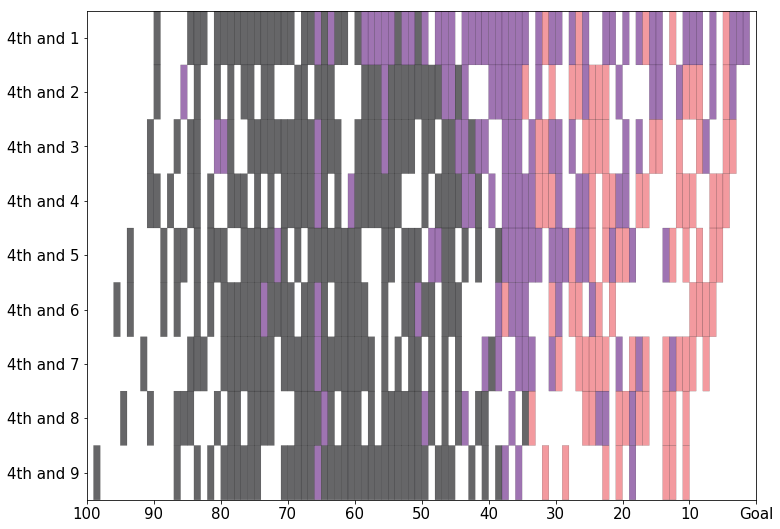

In [41]:
data = np.zeros((9, 99))
val = 0
for i in range(1, 10):
    for j in range(1, 100):
        if j not in mostcommon:
            val = np.nan
        else:
            if i in mostcommon[j]:
                decision = mostcommon[j][i]
                if decision == 'Punt':
                    val = 0
                elif decision == 'Go For It':
                    val = 5
                elif decision == 'Field Goal':
                    val = 10
            else:
                val = np.nan
        data[i - 1, j - 1] = val
        
            
data = data[::-1,::-1]

fig, ax = plt.subplots(figsize=(12, 9))

ax.pcolor(
    data,
    vmin = 1,
    vmax = 15,
    edgecolors='k', 
    linewidths=.2,
    cmap=cmap,
    alpha=.6
);
ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax.set_xticklabels(['100', '90', '80', '70', '60', '50', '40', '30', '20', '10', 'Goal'])
ax.set_yticks([yd - .5 for yd in range(1, 10)])
ax.set_yticklabels(['4th and {}'.format(yd) for yd in range(9, 0, -1)])
ax.tick_params(axis='both', which='major', labelsize=15)

plt.show()

In [55]:
def printHeatMap(team):
    playfrequencies = {}
    data = np.zeros((9, 99))
    if team not in mapping:
        raise ValueError('No such team ' + team + ' in the given data.')
    for i in range(1, 10):
        for j in range(1, 100):
            if j in mapping[team]:
                if i in mapping[team][j]:
                    playfrequencies[j] = {}
                    playfrequencies[j][i] = playteamfrequency(team, j, i)
                    freq = playfrequencies[j][i]
                    goforit = freq[0]
                    punt = freq[1]
                    fieldgoal = freq[2]
                    total = goforit + punt + fieldgoal
                    goforit = goforit / total
                    punt = punt / total
                    fieldgoal = fieldgoal / total
                    val = 5 + punt * -5 + fieldgoal * 5
                else:
                    val = np.nan
            else:
                val = np.nan
            data[i - 1, j - 1] = val
    data = data[::-1,::-1]

    fig, ax = plt.subplots(1, 1, figsize=(12, 9))

    ax.pcolor(data, edgecolors='k', linewidths=.2, cmap=cmap, alpha=.6)
    ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
    ax.set_xticklabels(['100', '90', '80', '70', '60', '50', '40', '30', '20', '10', 'Goal'])
    ax.set_yticks([yd - .5 for yd in range(1, 10)])
    ax.set_yticklabels(['4th and {}'.format(yd) for yd in range(9, 0, -1)])
    ax.tick_params(axis='both', which='major', labelsize=15)

    ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
    cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, ticks=[0, 0.5, 1])
    cb.ax.set_yticklabels(['Punt', 'Go For It', 'Field Goal']) 

    plt.show()

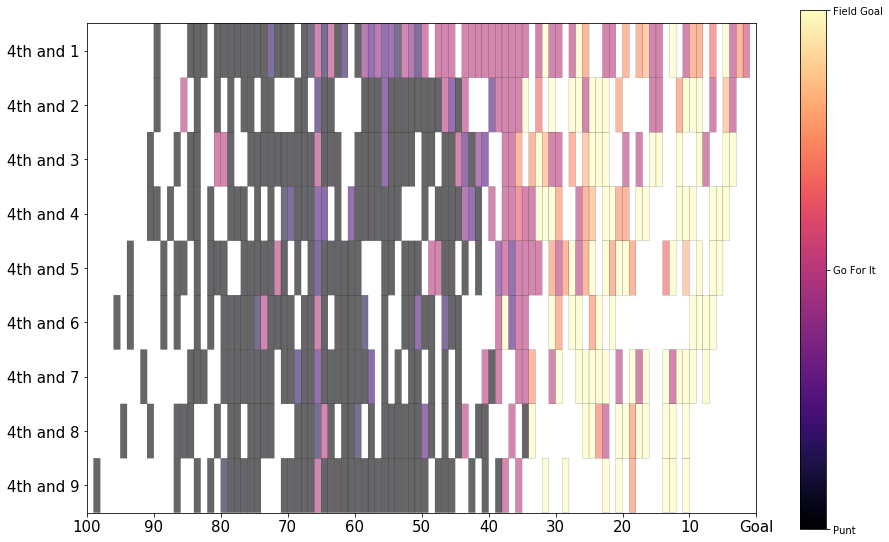

In [56]:
printHeatMap('CAL')